<a href="https://colab.research.google.com/github/kvcli/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection System


This notebook implements a hybrid approach to detect credit card fraud. It combines unsupervised learning (Self-Organizing Maps - SOM) to identify potential fraudulent patterns and then uses supervised deep learning (Artificial Neural Network - ANN) to build a predictive model based on the insights gained from the SOM.

**Problem Statement:** Identify potential fraudulent credit card applications.

**Part 1: Self-Organizing Maps (SOM)**
*   **Goal:** Use SOM to map high-dimensional data onto a low-dimensional grid, allowing for visual identification of clusters and outliers (potential frauds).
*   **Methodology:** Train a SOM on the credit card application data. The 'winner' nodes in the SOM represent clusters. By visualizing the Mean Interneuron Distance (MID) map, areas with high MID indicate boundaries between clusters or outliers. We then identify customers mapped to these outlier nodes as potential frauds.

**Part 2: Going from Unsupervised to Supervised Deep Learning**
*   **Goal:** Convert the unsupervised problem into a supervised one by creating a target variable (fraud/non-fraud) based on the SOM's output.
*   **Methodology:** The customers identified as 'frauds' by the SOM are labeled as '1' (fraudulent), and the rest are labeled as '0' (non-fraudulent). This creates a new dataset suitable for supervised learning.

**Part 3: Artificial Neural Network (ANN)**
*   **Goal:** Train an ANN to predict credit card fraud using the labeled dataset created in Part 2.
*   **Methodology:** Build and train a simple Artificial Neural Network (ANN) classifier. The ANN learns the patterns from the SOM-labeled data to predict whether a new applicant is likely to be fraudulent.

## Part 1 - SOM

### Importing the libraries

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=d8b2d6341de655821ca5ba1fa4fe999ad925c9d3eff66646c1364f4412530499
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

### Training the SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

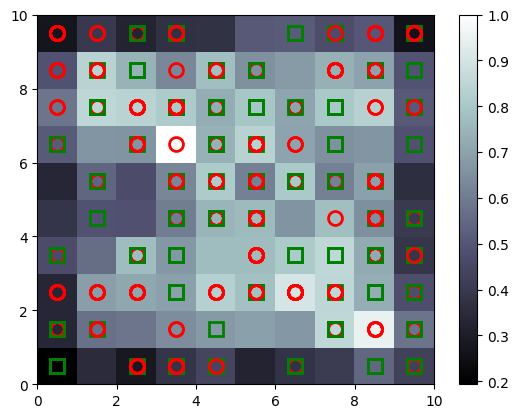

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,6)], mappings[(8,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Printing the fraudulent clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15750104
15745375
15654625
15802869
15750545
15665014


In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15637891
15627190
15568878
15605276
15580366
15594651
15785339
15716276


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [ ]:
# Taking all cols except fot the first col i.e "Customer ID"
customers = dataset.iloc[:, 1:].values

### Creating the Dependent Variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [ ]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7357 - loss: 0.8029
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9582 - loss: 0.3145
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9834 - loss: 0.2020
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9943 - loss: 0.1540
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9958 - loss: 0.1097
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0909
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.1167
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0628
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0646
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: 0.0437


### Predicting the test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
print(y_pred)

[[1.57785890e+07 3.32997697e-05]
 [1.56444000e+07 4.77241301e-05]
 [1.56844400e+07 6.80482626e-05]
 ...
 [1.57505450e+07 4.02940810e-01]
 [1.56514600e+07 4.59255308e-01]
 [1.56546250e+07 4.99501109e-01]]


In [ ]:
# Show suspected customers inside a pandas dataframe
df_fraud = pd.DataFrame(y_pred, columns=['CustomerID', 'Fraud_Probability'])
# df_fraud['Fraud_Probability'] = df_fraud['Fraud_Probability'] * 100
fraud_threshold = 0.3
df_fraud = df_fraud[df_fraud['Fraud_Probability'] > fraud_threshold].reset_index(drop=True)
print(df_fraud)

   CustomerID  Fraud_Probability
0  15665014.0           0.321324
1  15802869.0           0.334521
2  15750545.0           0.402941
3  15651460.0           0.459255
4  15654625.0           0.499501
